In [1]:
%matplotlib inline
#data manipulation
import numpy as np
import pandas as pd
#python imports
import math,time,random,datetime
#data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics
#from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('TRAIN_learnml.csv')
test=pd.read_csv('TEST_learnml.csv')
sample_submission=pd.read_csv('sample_submission_learnml.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,291378,Male,31,1,18,0,1-2 Year,Yes,2630,156,152
1,154746,Female,24,1,15,1,< 1 Year,No,28105,152,267
2,218512,Female,25,1,14,1,< 1 Year,No,29302,152,139
3,173930,Male,49,1,28,0,1-2 Year,Yes,28357,26,12
4,241471,Male,55,1,45,0,1-2 Year,Yes,33288,26,44


In [5]:
sample_submission.head()

,id,Response
0,291378,1
1,154746,0
2,218512,0
3,173930,1
4,241471,0


In [9]:
submission = pd.DataFrame(test,columns=['id'])
submission.head()

,id
0,291378
1,154746
2,218512
3,173930
4,241471


In [10]:
print(train.dtypes)

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object


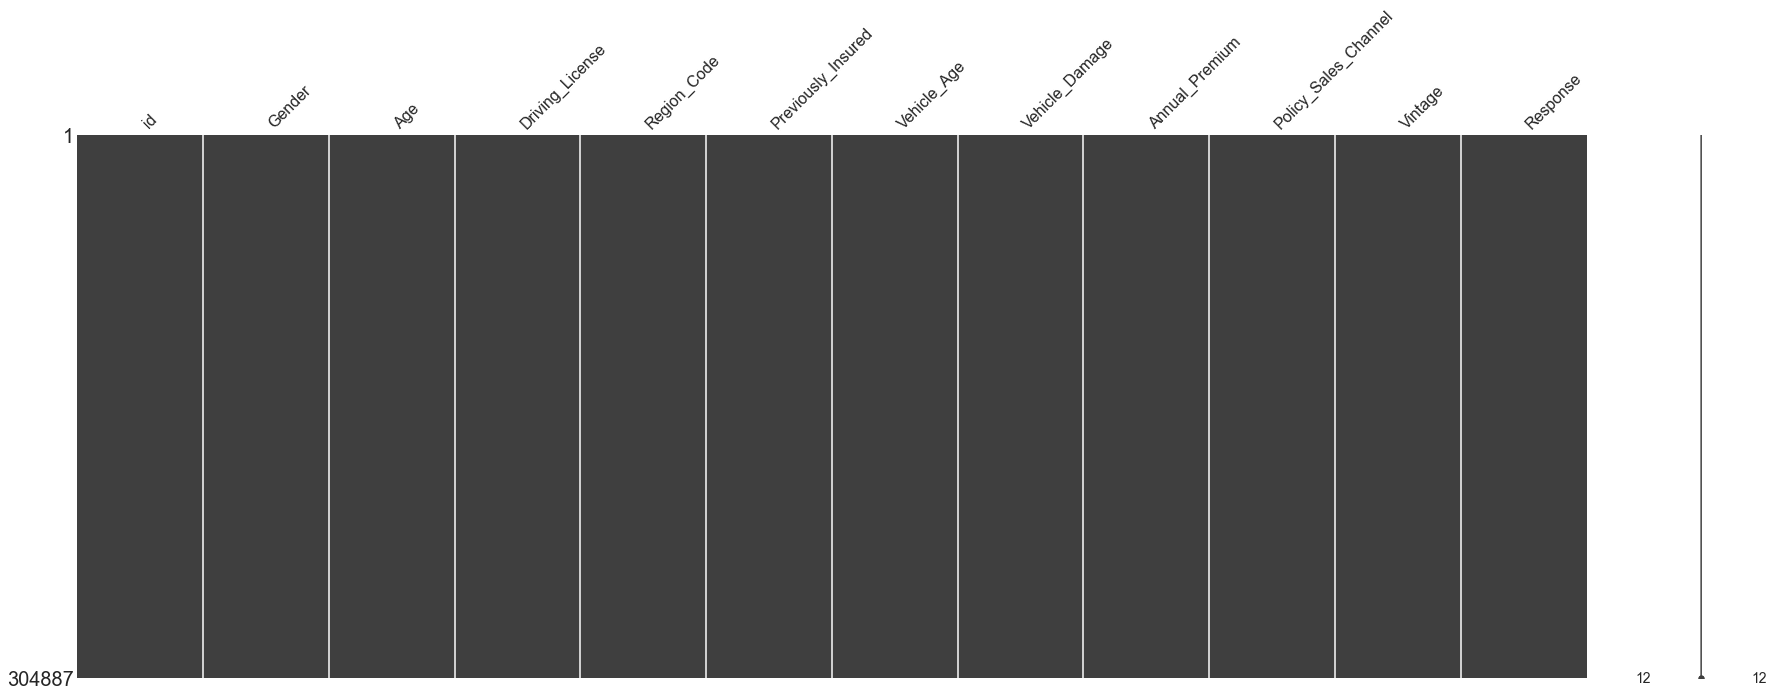

In [11]:
import missingno
missingno.matrix(train, figsize=(30,10))

In [14]:
train.Driving_License.value_counts()

1    304239
0       648
Name: Driving_License, dtype: int64

In [16]:
train.Previously_Insured.value_counts()

0    165116
1    139771
Name: Previously_Insured, dtype: int64

In [17]:
train.Vehicle_Age.value_counts()

1-2 Year     160244
< 1 Year     131823
> 2 Years     12820
Name: Vehicle_Age, dtype: int64

In [18]:
train.Vehicle_Damage.value_counts()

Yes    153897
No     150990
Name: Vehicle_Damage, dtype: int64

In [19]:
train.Policy_Sales_Channel.value_counts()

152    107762
26      63799
124     59170
160     17471
156      8525
        ...  
84          1
112         1
28          1
41          1
143         1
Name: Policy_Sales_Channel, Length: 151, dtype: int64

In [21]:
len(train)

304887

In [22]:
train.Vintage.value_counts()

256    1156
282    1133
131    1130
31     1125
160    1122
       ... 
235     987
224     974
237     967
205     966
277     964
Name: Vintage, Length: 290, dtype: int64

In [23]:
train.Region_Code.value_counts()

28    85047
8     27296
46    15794
41    14621
15    10612
30     9673
29     8859
50     8193
3      7420
11     7386
36     7044
33     6068
47     5986
35     5513
6      4995
45     4515
37     4380
18     4166
14     3733
48     3709
39     3690
10     3507
21     3410
13     3211
2      3183
7      2625
12     2577
9      2437
32     2261
27     2251
43     2119
17     2109
26     2088
25     2027
24     1963
0      1633
38     1623
16     1600
23     1573
31     1565
20     1561
49     1458
4      1445
34     1339
19     1211
40     1058
22     1033
5      1023
1       802
44      649
42      480
52      217
51      149
Name: Region_Code, dtype: int64

In [24]:
train.Gender.value_counts()

Male      164823
Female    140064
Name: Gender, dtype: int64

In [26]:
train['Gender']=np.where(train['Gender'] == 'Female',1,0)

In [27]:
train['Vehicle_Damage']=np.where(train['Vehicle_Damage'] == 'Yes',1,0)

In [28]:
Va_dict = {'1-2 Year':1, '< 1 Year':0, '> 2 Years':2}
train['Vehicle_Age'] = train.Vehicle_Age.map(Va_dict)
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,0,50,1,41,0,1,1,35915,124,240,0
1,239788,1,48,1,28,0,1,1,26873,124,274,0
2,348272,1,34,1,41,0,1,1,2630,156,138,1
3,73940,1,43,1,28,0,1,1,46877,124,223,0
4,292871,0,29,1,28,1,0,0,38009,152,106,0


In [30]:
train.drop('id',inplace=True,axis=1)

In [31]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,50,1,41,0,1,1,35915,124,240,0
1,1,48,1,28,0,1,1,26873,124,274,0
2,1,34,1,41,0,1,1,2630,156,138,1
3,1,43,1,28,0,1,1,46877,124,223,0
4,0,29,1,28,1,0,0,38009,152,106,0


In [32]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
train['Policy_Sales_Channel'] = label_encoder.fit_transform(train['Policy_Sales_Channel'])

In [33]:
train['Vintage'] = label_encoder.fit_transform(train['Vintage'])

In [34]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,50,1,41,0,1,1,35915,117,230,0
1,1,48,1,28,0,1,1,26873,117,264,0
2,1,34,1,41,0,1,1,2630,145,128,1
3,1,43,1,28,0,1,1,46877,117,213,0
4,0,29,1,28,1,0,0,38009,141,96,0


In [35]:
train.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,-0.145755,0.017820,0.000226,0.082234,-0.161021,-0.091840,-0.002869,0.108224,0.003057,-0.052998
Age,-0.145755,1.000000,-0.079636,0.040662,-0.255066,0.765670,0.267805,0.066909,-0.570572,-0.001894,0.111127
Driving_License,0.017820,-0.079636,1.000000,-0.000893,0.014160,-0.036761,-0.015799,-0.010847,0.043252,-0.000192,0.010495
Region_Code,0.000226,0.040662,-0.000893,1.000000,-0.022904,0.041808,0.026856,-0.010768,-0.040803,-0.001534,0.008980
Previously_Insured,0.082234,-0.255066,0.014160,-0.022904,1.000000,-0.380842,-0.824149,0.002652,0.215799,0.003221,-0.340982
Vehicle_Age,-0.161021,0.765670,-0.036761,0.041808,-0.380842,1.000000,0.396696,0.041985,-0.542522,-0.001763,0.221566
Vehicle_Damage,-0.091840,0.267805,-0.015799,0.026856,-0.824149,0.396696,1.000000,0.011058,-0.220743,-0.001596,0.354266
Annual_Premium,-0.002869,0.066909,-0.010847,-0.010768,0.002652,0.041985,0.011058,1.000000,-0.111802,-0.000518,0.021832
Policy_Sales_Channel,0.108224,-0.570572,0.043252,-0.040803,0.215799,-0.542522,-0.220743,-0.111802,1.000000,0.001032,-0.136537
Vintage,0.003057,-0.001894,-0.000192,-0.001534,0.003221,-0.001763,-0.001596,-0.000518,0.001032,1.000000,0.000247


In [36]:
train.skew()

Gender                   0.162953
Age                      0.671707
Driving_License        -21.622011
Region_Code             -0.114015
Previously_Insured       0.166837
Vehicle_Age              0.253162
Vehicle_Damage          -0.019070
Annual_Premium           1.898870
Policy_Sales_Channel    -0.921697
Vintage                  0.004377
Response                 2.304840
dtype: float64

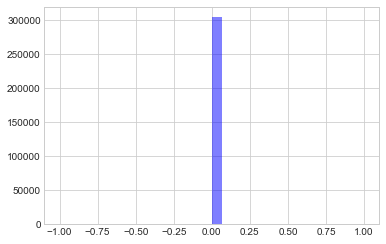

In [39]:
plt.figure()
train['Driving_License'].diff().hist(color='b', alpha=0.5, bins=30)

In [40]:
train.Response.value_counts()

0    267582
1     37305
Name: Response, dtype: int64

In [41]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,50,1,41,0,1,1,35915,117,230,0
1,1,48,1,28,0,1,1,26873,117,264,0
2,1,34,1,41,0,1,1,2630,145,128,1
3,1,43,1,28,0,1,1,46877,117,213,0
4,0,29,1,28,1,0,0,38009,141,96,0


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
train[['Annual_Premium','Policy_Sales_Channel','Vintage','Region_Code','Age']] = scaler.fit_transform(train[['Annual_Premium','Policy_Sales_Channel','Vintage','Region_Code','Age']])

In [44]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0.461538,1,0.788462,0,1,1,0.061922,0.780000,0.795848,0
1,1,0.430769,1,0.538462,0,1,1,0.045100,0.780000,0.913495,0
2,1,0.215385,1,0.788462,0,1,1,0.000000,0.966667,0.442907,1
3,1,0.353846,1,0.538462,0,1,1,0.082315,0.780000,0.737024,0
4,0,0.138462,1,0.538462,1,0,0,0.065817,0.940000,0.332180,0


In [47]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,291378,Male,31,1,18,0,1-2 Year,Yes,2630,156,152
1,154746,Female,24,1,15,1,< 1 Year,No,28105,152,267
2,218512,Female,25,1,14,1,< 1 Year,No,29302,152,139
3,173930,Male,49,1,28,0,1-2 Year,Yes,28357,26,12
4,241471,Male,55,1,45,0,1-2 Year,Yes,33288,26,44


In [48]:
test.drop('id',inplace=True,axis=1)
test['Gender']=np.where(test['Gender'] == 'Female',1,0)
test['Vehicle_Damage']=np.where(test['Vehicle_Damage'] == 'Yes',1,0)
test['Vehicle_Age'] = test.Vehicle_Age.map(Va_dict)

test['Policy_Sales_Channel'] = label_encoder.fit_transform(test['Policy_Sales_Channel'])
test['Vintage'] = label_encoder.fit_transform(test['Vintage'])

test[['Annual_Premium','Policy_Sales_Channel','Vintage','Region_Code','Age']] = scaler.fit_transform(test[['Annual_Premium','Policy_Sales_Channel','Vintage','Region_Code','Age']])

In [49]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,0.169231,1,0.346154,0,1,1,0.000000,0.963504,0.491349
1,1,0.061538,1,0.288462,1,0,0,0.054270,0.934307,0.889273
2,1,0.076923,1,0.269231,1,0,0,0.056820,0.934307,0.446367
3,0,0.446154,1,0.538462,0,1,1,0.054807,0.167883,0.006920
4,0,0.538462,1,0.865385,0,1,1,0.065311,0.167883,0.117647


In [52]:
y = pd.DataFrame(train,columns=['Response'])
train.drop('Response',inplace=True,axis=1)

In [67]:
from sklearn import model_selection,tree,preprocessing,metrics
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()
clf.fit(train,y)

acc_gbt = round(clf.score(train,y)*100,2)
train_pred=model_selection.cross_val_predict(clf,train,y,cv=20,n_jobs=-1)
acc_cv_gbt=round(metrics.accuracy_score(y,train_pred)*100,2)

print("Accuracy: %s" % acc_gbt) 
print("Accuracy CV 10-fold: %s" % acc_cv_gbt)

Accuracy: 87.76
Accuracy CV 10-fold: 87.76


In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(train,y)

acc_rand = round(classifier.score(train,y)*100,2)
print("Accuracy: %s" % acc_rand) 

train_pred=model_selection.cross_val_predict(classifier,train,y,cv=10,n_jobs=-1)
acc_cv_rand=round(metrics.accuracy_score(y,train_pred)*100,2)
print("Accuracy CV 10-fold: %s" % acc_cv_rand)

Accuracy: 99.95
Accuracy CV 10-fold: 86.65


In [65]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train,y)

GaussianNB()

In [66]:
acc_gnb = round(gnb.score(train,y)*100,2)
print("Accuracy: %s" % acc_gnb)

train_pred=model_selection.cross_val_predict(gnb,train,y,cv=10,n_jobs=-1)
acc_cv_gnb=round(metrics.accuracy_score(y,train_pred)*100,2)
print("Accuracy CV 10-fold: %s" % acc_cv_gnb)

Accuracy: 63.96
Accuracy CV 10-fold: 63.96


In [60]:
predictions = clf.predict(test)

In [61]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
submission['Response'] = predictions
submission.head()

,id,Response
0,291378,0
1,154746,0
2,218512,0
3,173930,0
4,241471,0


In [64]:
submission.to_csv('C:/Users/Asus/OneDrive/Desktop/dockship/learn ml insurance prediction/submission_file_learnml.csv',index = False)
print("submission is ready")

submission is ready
